In [1]:
!pip install pandas numpy matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("screen_time.csv")  # Make sure the file is in the same folder

print(df.head())        # First 5 rows
print(df.tail(3))       # Last 3 rows
print(df.dtypes)        # Data types
print(df.isna().sum())  # Missing values

   Age Gender Screen Time Type Day Type  Average Screen Time (hours)  \
0    5   Male      Educational  Weekday                         0.44   
1    5   Male     Recreational  Weekday                         1.11   
2    5   Male            Total  Weekday                         1.55   
3    5   Male      Educational  Weekend                         0.50   
4    5   Male     Recreational  Weekend                         1.44   

   Sample Size  
0          500  
1          500  
2          500  
3          500  
4          500  
     Age                   Gender Screen Time Type Day Type  \
195   15  Other/Prefer not to say      Educational  Weekend   
196   15  Other/Prefer not to say     Recreational  Weekend   
197   15  Other/Prefer not to say            Total  Weekend   

     Average Screen Time (hours)  Sample Size  
195                         2.19          300  
196                         5.77          300  
197                         7.96          300  
Age                 

In [4]:
# Fill missing ages with median (use correct column name if different)
df['Age'] = df['Age'].fillna(np.nanmedian(df['Age']))

# Convert gender to numbers
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})

# Drop unnecessary columns (change names based on your dataset)
df = df.drop(columns=['Name', 'Cabin', 'Ticket'], errors='ignore')

In [5]:
print("Mean age:", np.mean(df['Age']))
print("Median screen time:", np.median(df['Average Screen Time (hours)']))
print("Standard deviation of age:", np.std(df['Age']))

# Groupby analysis
print(df.groupby('Gender')['Average Screen Time (hours)'].mean())

# Filtering heavy screen users
heavy_users = df[(df['Average Screen Time (hours)'] > 8)]
print("Number of heavy screen time users:", len(heavy_users))


Mean age: 10.0
Median screen time: 2.49
Standard deviation of age: 3.1622776601683795
Series([], Name: Average Screen Time (hours), dtype: float64)
Number of heavy screen time users: 2


In [6]:
pivot = pd.pivot_table(df, index='Day Type', columns='Gender', values='Average Screen Time (hours)', aggfunc='mean')
print(pivot)


Empty DataFrame
Columns: []
Index: []


In [7]:
print(df.columns)

Index(['Age', 'Gender', 'Screen Time Type', 'Day Type',
       'Average Screen Time (hours)', 'Sample Size'],
      dtype='object')


In [8]:
print(df['Gender'].value_counts(dropna=False))


Gender
NaN    198
Name: count, dtype: int64


In [9]:
pivot = pd.pivot_table(
    df,
    index='Day Type',
    values='Average Screen Time (hours)',
    aggfunc='mean'
)
print(pivot)


          Average Screen Time (hours)
Day Type                             
Weekday                      2.661111
Weekend                      3.324949


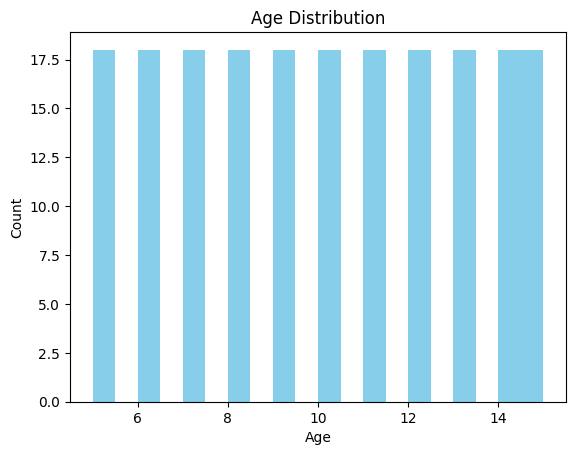

In [11]:
plt.hist(df['Age'], bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


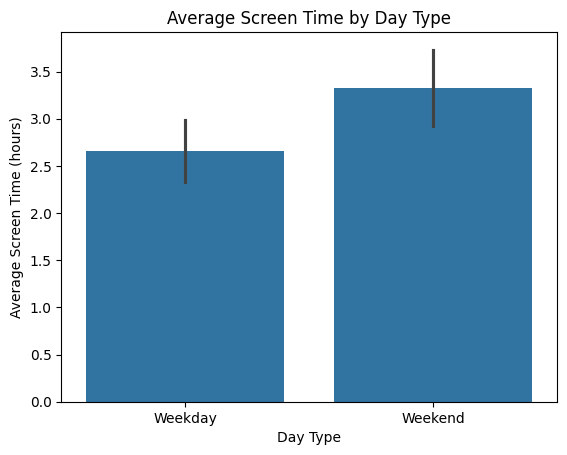

In [12]:
sns.barplot(x='Day Type', y='Average Screen Time (hours)', data=df)
plt.title('Average Screen Time by Day Type')
plt.show()


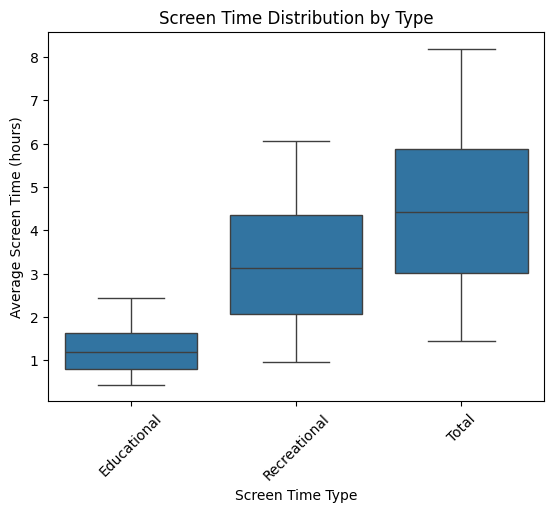

In [13]:
sns.boxplot(x='Screen Time Type', y='Average Screen Time (hours)', data=df)
plt.title('Screen Time Distribution by Type')
plt.xticks(rotation=45)
plt.show()


In [14]:
# Normalize age using z-score
age_mean = np.mean(df['Age'])
age_std = np.std(df['Age'])
df['Age_zscore'] = (df['Age'] - age_mean) / age_std

# Boolean indexing
ages = df['Age'].values
young_adults = df[np.logical_and(ages >= 18, ages <= 25)]
print("Number of young adults (18-25):", len(young_adults))


Number of young adults (18-25): 0


In [16]:
# Just copy average screen time to simulate "Net Usage"
df['Net Usage'] = df['Average Screen Time (hours)']  # or modify it if needed
print(df[['Average Screen Time (hours)', 'Net Usage']].head())


   Average Screen Time (hours)  Net Usage
0                         0.44       0.44
1                         1.11       1.11
2                         1.55       1.55
3                         0.50       0.50
4                         1.44       1.44


In [18]:
# Pivot 1 — use a valid column name
pivot1 = pd.pivot_table(df, index='Gender', values='Average Screen Time (hours)', aggfunc='sum')
print("Pivot 1:\n", pivot1)

# Pivot 2 — same fix
pivot2 = pd.pivot_table(df, index='Day Type', columns='Gender', values='Average Screen Time (hours)', aggfunc='mean')
print("\nPivot 2:\n", pivot2)

# Groupby comparison — this is fine as-is
groupby_comparison = df.groupby(['Day Type', 'Gender'])['Average Screen Time (hours)'].mean()
print("\nGroupby Comparison:\n", groupby_comparison)


Pivot 1:
 Empty DataFrame
Columns: []
Index: []

Pivot 2:
 Empty DataFrame
Columns: []
Index: []

Groupby Comparison:
 Series([], Name: Average Screen Time (hours), dtype: float64)


In [19]:
print("Overall average screen time:", df['Average Screen Time (hours)'].mean())
print("Max screen time:", df['Average Screen Time (hours)'].max())
print("Min screen time:", df['Average Screen Time (hours)'].min())


Overall average screen time: 2.9930303030303023
Max screen time: 8.19
Min screen time: 0.44


In [20]:
# Average screen time per type
print(df.groupby('Screen Time Type')['Average Screen Time (hours)'].mean())


Screen Time Type
Educational     1.226970
Recreational    3.262273
Total           4.489848
Name: Average Screen Time (hours), dtype: float64


In [21]:
# Compare usage on Weekdays vs Weekends
weekday_vs_weekend = df.groupby('Day Type')['Average Screen Time (hours)'].mean()
print(weekday_vs_weekend)


Day Type
Weekday    2.661111
Weekend    3.324949
Name: Average Screen Time (hours), dtype: float64


In [22]:
# Highest screen time entry
max_user = df[df['Average Screen Time (hours)'] == df['Average Screen Time (hours)'].max()]
print("User(s) with highest screen time:\n", max_user)


User(s) with highest screen time:
      Age  Gender Screen Time Type Day Type  Average Screen Time (hours)  \
191   15     NaN            Total  Weekend                         8.19   

     Sample Size  Age_zscore  Net Usage  
191          300    1.581139       8.19  


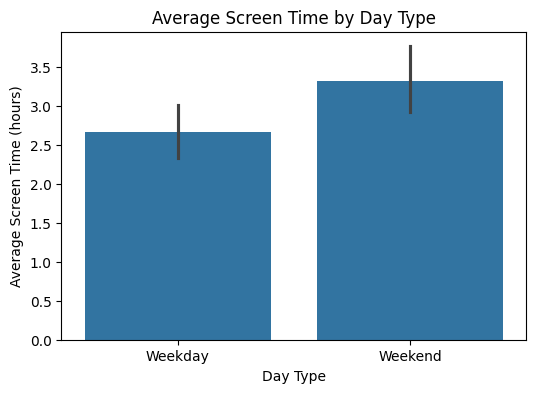

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of screen time by Day Type
plt.figure(figsize=(6,4))
sns.barplot(x='Day Type', y='Average Screen Time (hours)', data=df)
plt.title('Average Screen Time by Day Type')
plt.show()


In [24]:
def usage_category(hours):
    if hours < 2:
        return 'Low'
    elif hours < 5:
        return 'Moderate'
    else:
        return 'High'

df['Usage Category'] = df['Average Screen Time (hours)'].apply(usage_category)
print(df[['Average Screen Time (hours)', 'Usage Category']].head())


   Average Screen Time (hours) Usage Category
0                         0.44            Low
1                         1.11            Low
2                         1.55            Low
3                         0.50            Low
4                         1.44            Low


In [3]:
import pandas as pd
df = pd.read_csv("screen_time.csv")
print(df.head(10))  # First 10 rows
print(df.tail(10))  # Last 10 rows


   Age  Gender Screen Time Type Day Type  Average Screen Time (hours)  \
0    5    Male      Educational  Weekday                         0.44   
1    5    Male     Recreational  Weekday                         1.11   
2    5    Male            Total  Weekday                         1.55   
3    5    Male      Educational  Weekend                         0.50   
4    5    Male     Recreational  Weekend                         1.44   
5    5    Male            Total  Weekend                         1.93   
6    5  Female      Educational  Weekday                         0.49   
7    5  Female     Recreational  Weekday                         0.96   
8    5  Female            Total  Weekday                         1.45   
9    5  Female      Educational  Weekend                         0.50   

   Sample Size  
0          500  
1          500  
2          500  
3          500  
4          500  
5          500  
6          500  
7          500  
8          500  
9          500  
     Age 

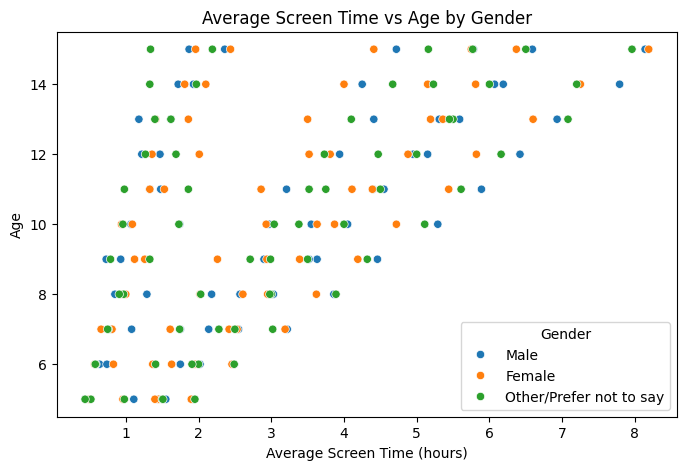

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

sns.scatterplot(
    x='Average Screen Time (hours)',
    y='Age',  # You can change this to another numeric column if needed
    hue='Gender',
    data=df
)

plt.title('Average Screen Time vs Age by Gender')
plt.xlabel('Average Screen Time (hours)')
plt.ylabel('Age')
plt.show()



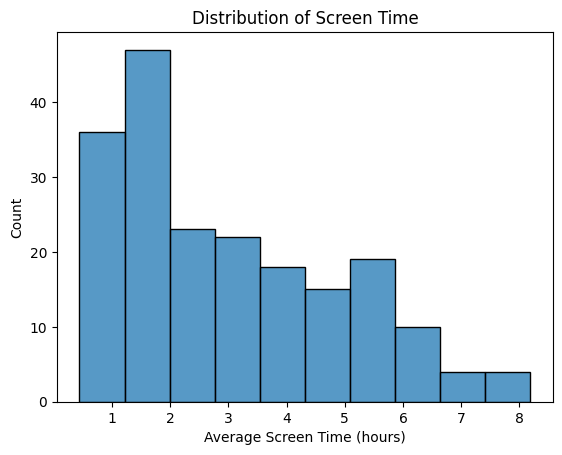

In [8]:
sns.histplot(data=df, x='Average Screen Time (hours)', bins=10)
plt.title('Distribution of Screen Time')
plt.show()


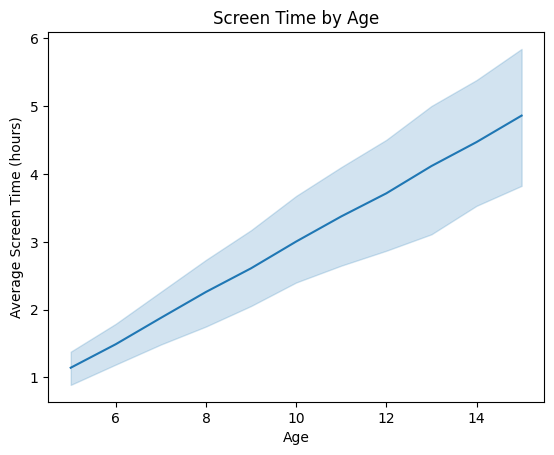

In [9]:
sns.lineplot(x='Age', y='Average Screen Time (hours)', data=df)
plt.title('Screen Time by Age')
plt.show()


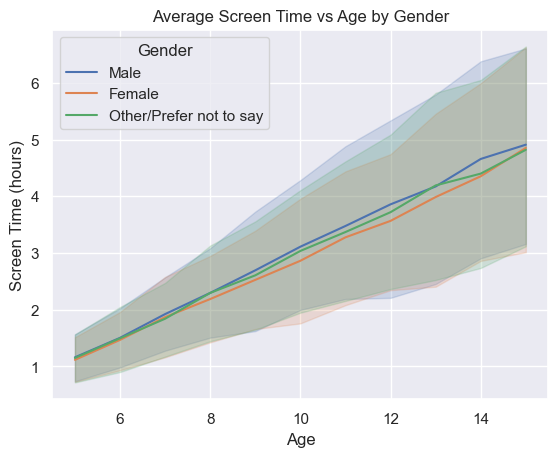

In [11]:
sns.lineplot(x='Age', y='Average Screen Time (hours)', hue='Gender', data=df)
plt.title('Average Screen Time vs Age by Gender')
plt.xlabel('Age')
plt.ylabel('Screen Time (hours)')
plt.show()
